#                                      ***************************** Project Overview:- *****************************
# - We are working on a 'Kyphosis Prediction Project' where we have some features availables in the dataset on the basis of that we have to predict whether the person is having Kyphosis or not.

## * Data Dictionary:- 
## - Kyphosis :- Basically it's dependent variable means it's label or target variable where it's mentioned that whether a person have 'Kyphosis' or not in the form of 'present' or 'absent'.
## - Age :- In this feature we can find the age of a person.
## - Number:- It's basically the number of 'vertebra' effected. It's basically small back bones available in human body.
## - Start:- It's basically from how many 'vertebra' kyphosis started from.

## * Importing important Libraries for importing dataset, Numerical operations, data visualization and for prediction purpose.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## * Importing dataset using pandas library and checking first 5 rows here.

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## * Here we are checking the information about dataset like Null Values and Data types of the column using info function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## * Now we are going to check the summary (distribution) of the data using describe function and histplot chart. Also with the help of boxplot we are checking if outliers avialble in the features.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Kyphosis,81,2,absent,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,81.0,NaN,NaN,NaN,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,NaN,NaN,NaN,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,NaN,NaN,NaN,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


<Axes: xlabel='Age', ylabel='Count'>

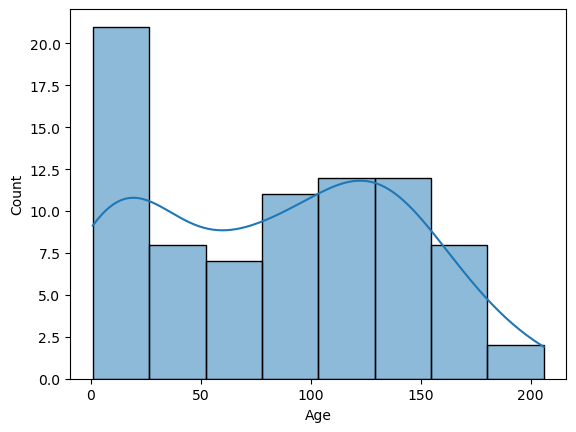

In [6]:
sns.histplot(data=df, x='Age', kde= True)

<Axes: xlabel='Age'>

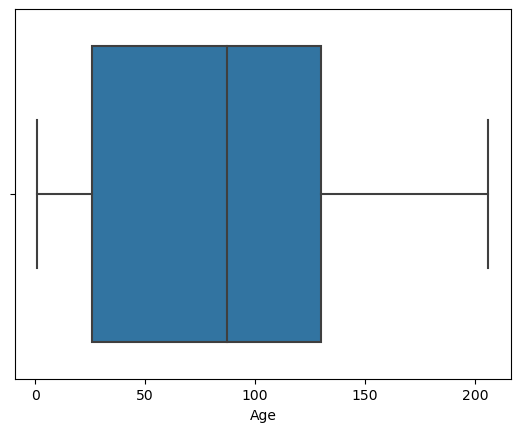

In [7]:
sns.boxplot(data=df, x='Age')

<Axes: xlabel='Number', ylabel='Count'>

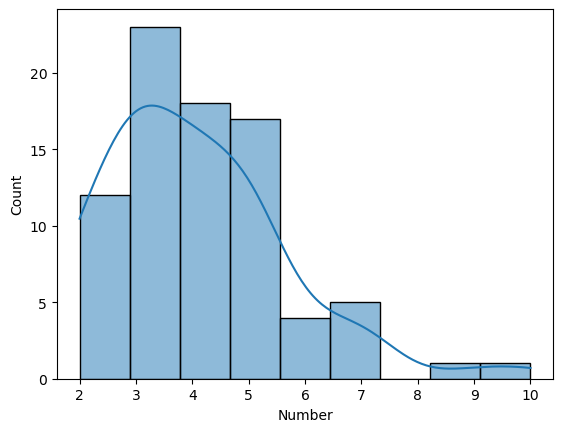

In [8]:
sns.histplot(data=df, x='Number', kde=True)

<Axes: xlabel='Number'>

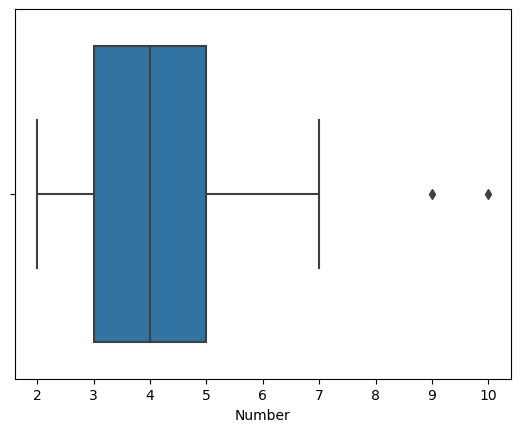

In [9]:
sns.boxplot(data=df, x='Number')

<Axes: xlabel='Start', ylabel='Count'>

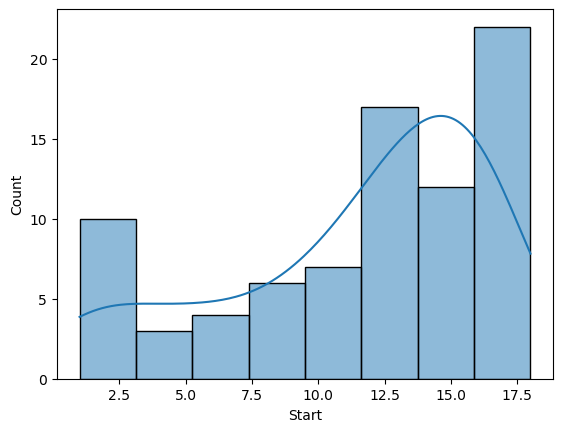

In [10]:
sns.histplot(data=df, x='Start', kde=True)

<Axes: xlabel='Start'>

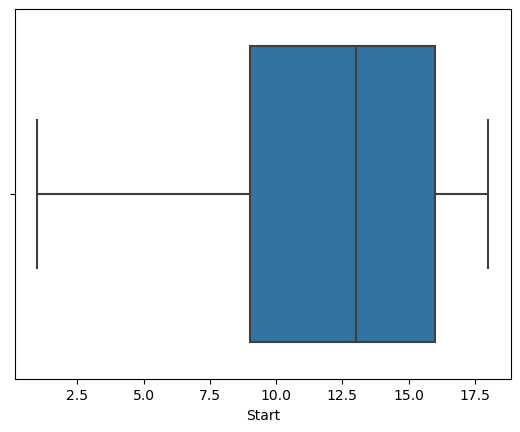

In [11]:
sns.boxplot(data=df, x='Start')

### * Observation:-
### - As we checked the distribution of this dataset in 'Age' column mean (83) and median (87) are approx near to each other.
### - Also we have checked in 'Number' column most of the data is towards left side and tail of the data is towards right. So it's Right Skewed data there and 'Start' Column tail is towards left side it means it 'Left Skewed' data available there.
### - Apart from this we also found some outliers in 'Number' Column which is more than maximum value which we have to remove them but before removing outliers we are going to convert this categorical column in numerical one so we can perform outliers treatment.

In [12]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [13]:
df['Kyphosis'] = np.where(df['Kyphosis'] == 'present',1,0)

In [14]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


## * In order to remove Outliers we are going to use 'zscore' technique and import it from scipy.stats. 

In [15]:
from scipy.stats import zscore

z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)


In [16]:
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Adjust the threshold as needed
df= df[filtered_entries]

<Axes: xlabel='Number'>

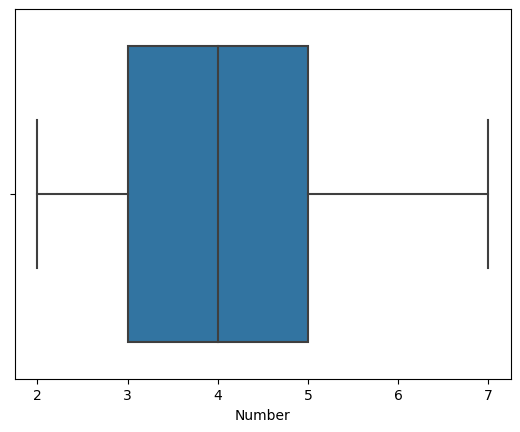

In [17]:
sns.boxplot(data=df, x='Number')

### - Now we can see that outliers removed from this 'Number' column.

In [18]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


## * This time we are checking the correlation between available columns in dataset using corr() function and visualizing using heatmap in seaborn library.

<Axes: >

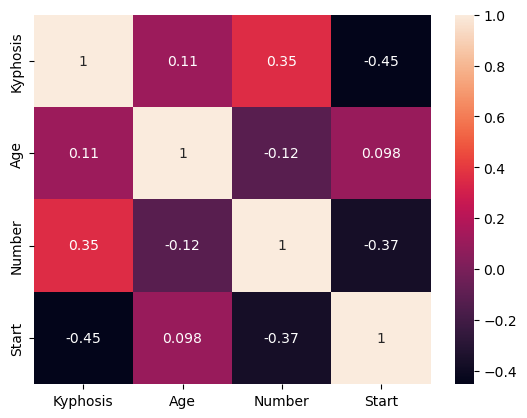

In [19]:
heat= df.corr()
sns.heatmap(data=heat, annot = True)

## Now we are going to separate this dataset in features (independent variable) and target variable (dependent variable)

In [20]:
x = df[['Age','Number','Start']]
y = df['Kyphosis']

In [21]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [22]:
x.shape

(79, 3)

In [23]:
y.shape

(79,)

## * Now we have to check about 'Target' Variable or Label column and we are checking how many data records available in 'Present - 1' and 'Absent - 0' using graph.

In [24]:
y.value_counts()

0    63
1    16
Name: Kyphosis, dtype: int64

<Axes: xlabel='Kyphosis', ylabel='count'>

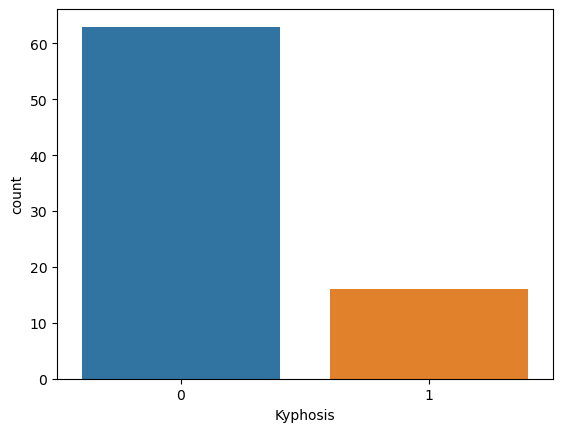

In [25]:
sns.countplot(x=y)

### * Observation:- 
### - As we can see we have many records 63 records available in '16' means maximum of not present people and less 17 records in '1' it means minimum people suffering with this disease. If we'll train the model in this way it may be possible our model may be 'bias' towards 'Absent' why???? Because we are giving many example for 'Absent'. In order to metigate this problem we are going to use 'SMOTE' technique because we have imbalanced classification dataset here.

In [26]:
import sys


x_np = x.to_numpy()
y_np = y.to_numpy()

print('This is the size of without using Numpy',sys.getsizeof(x))
print("If we using Numpy it'll take this much of time",sys.getsizeof(x_np))
print('This is the size of without using Numpy for target variable (y)',sys.getsizeof(y))
print('This is the size of memory it take while using Numpy',sys.getsizeof(y_np))

This is the size of without using Numpy 2560
If we using Numpy it'll take this much of time 128
This is the size of without using Numpy for target variable (y) 980
This is the size of memory it take while using Numpy 112


### * Observation:-
### - We got to know one thing if we are using numpy instead of pandas it takes very less memory space. 

### * So here we are going to split this data in train and test part for training and test purpose. You can find below we are dividing 70% of the data in training part and 30% of the data test part. Also we are using 'stratify=y' here because we want to give same data size in testing as well in other words for same proportion of class labels as the input dataset.

In [27]:
# Here we are importing all the required library from 'sklearn' as we need to split the data in 'train' and 'test' part

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify = y)
x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(x_np,y_np,test_size=0.3, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)
print(x_train_np.shape, x_test_np.shape, y_train_np.shape , y_test_np.shape)
print(type(x_train), type(x_train_np))

(55, 3) (24, 3) (55,) (24,)
(55, 3) (24, 3) (55,) (24,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [29]:
x_train.head()

,Age,Number,Start
62,81,4,1
58,51,7,9
41,35,3,13
24,15,7,2
74,11,3,15


In [30]:
x_train.shape

(55, 3)

In [31]:
x_test.shape

(24, 3)

In [32]:
y_train.shape

(55,)

In [33]:
y_train.shape

(55,)

In [34]:
y_test.shape

(24,)

## * As we have checked shape of all training and test dataset now we are checking the count of test dataset just to know if it's distributed in same shape or not.

<Axes: >

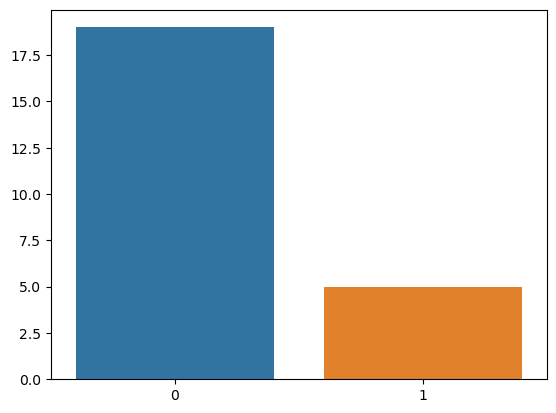

In [35]:
vc= y_test.value_counts()
sns.barplot(x= vc.index, y= vc.values)
# SMOTE

### - Our dataset is divided at the time of test in same format means we have maximum 0 and less 1. as it was at the time of separating dataset in x and y.

# -- -- Now we are going to use few 'Machine Learning Algorithm' in order to train our 'Model' and check accuracy out there. -- -- 

## * So first we are using 'Logistic Regression' Algorithm for training our model below:- 

In [36]:
from timeit import default_timer as timer

start = timer()
lr= LogisticRegression(multi_class= 'ovr')
lr.fit(x_train, y_train)
lr.predict(x_test)
print(timer() - start)

0.024811399984173477


In [37]:
start = timer()
lr= LogisticRegression()for i,j in enumerate(ans == y_test_np):
    if not j:
        print(ans[i])
lr.fit(x_train_np, y_train_np)
ans= lr.predict(x_test_np)
ans_p= lr.predict_proba(x_test_np)
print(timer() - start)

0.011329600005410612


### - Observation:- As we checked above we have use default_timer from 'timeit' library in order to check how much time it's taking while we train our model using normal or numpy format. So as you can see while we fit model in Logistic Regression using normatl fit it's taking time somewhere aroung '0.0248 seconds' while using numpy it's just taking '0.011 seconds'. It's better to use 'Numpy' if we have large dataset around because it's time consuming there.


## - Here we are checking the model which we trained what are the wrong output it's giving if it's 0 means the actual person has 'kyphosis' but it's predicting no. If it's 1 it means actual person doesn't have 'kyphosis' but it's predicting yes.

In [39]:
for i,j in enumerate(ans == y_test_np):
    if not j:
        print(ans[i])

0
1
0
1
0


## - Now we are checking how much accuracy our model giving with 'Logistic Regression' Algorithm.

In [40]:
accuracy_score(ans, y_test_np)

0.7916666666666666

### - Observation:- 'Logistic Regression' Model giving us '79.6%' Accuracy.

## * Now we are using 'Minmaxscaler' and 'Standardscaler' in order to scale our dataset. We are using scaling technique just to equalize the data available there.

In [41]:
min_max_scaler= MinMaxScaler()
standard_scaler= StandardScaler()

min_max_scaler.fit(x_train_np)
x_train_np_mm = min_max_scaler.transform(x_train_np)
x_test_np_mm = min_max_scaler.transform(x_test_np)

In [43]:
start = timer()
lr.fit(x_train_np_mm, y_train_np)
accuracy_score(lr.predict(x_test_np_mm),y_test_np)
print(timer() - start)

0.007652800064533949


In [44]:
standard_scaler.fit(x_train_np)
x_train_np_std = standard_scaler.transform(x_train_np)
x_test_np_std  = standard_scaler.transform(x_test_np)

start = timer()
lr.fit(x_train_np_std, y_train_np)
accuracy_score(lr.predict(x_test_np_std),y_test_np)
print(timer() - start)

0.005327299935743213


### - Observation:- We have checked above when we have scale down our dataset using 'Minmaxscaler' in order to fit in 'LogisticRegression' with numpy format it took '0.0076' seconds and it took '0.005' seconds while using 'StandardScaler' scaling technique which is very faster in order to use simple 'LogisticRegression' fitting which was '0.024' and '0.011' before.

## * Also we are going to visualize this transformation of data using matplotlib lineplot while we use 'standardscaler', 'minmaxscaler' and simple technique.

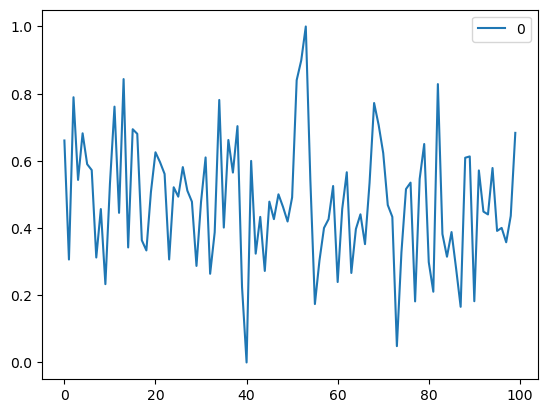

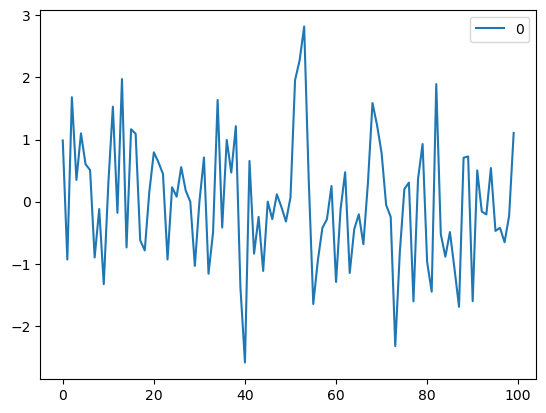

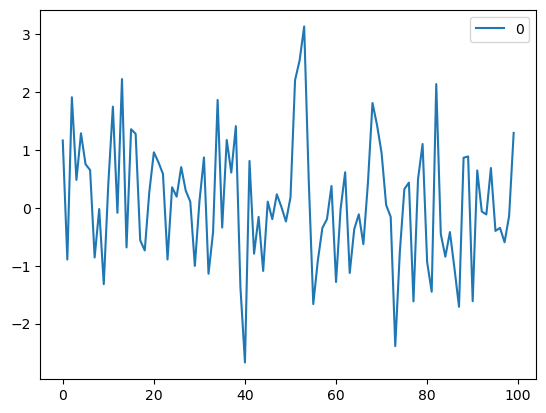

In [45]:
import matplotlib.pyplot as plt

arr= np.random.randn(100,1)
mm_scaler= MinMaxScaler()
std_scaler= StandardScaler()

mms_arr= mm_scaler.fit_transform(arr)
std_arr= std_scaler.fit_transform(arr)

sns.lineplot(mms_arr)
plt.show()
sns.lineplot(std_arr)
plt.show()
sns.lineplot(arr)
plt.show()

### - Observation:-  As we have seen above we don't find huge changes in shape of dataset trend. But we have noticed that it only change the 'magnitude' of the dataset.

## * This time we are using another 'Naive Bayes' Machine Learning Algorithm in order to train our Model.

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_np_mm, y_train)
accuracy_score(gnb.predict(x_test_np_mm), y_test_np)

0.7916666666666666

In [49]:
print(lr.coef_)

[[ 0.53666829  0.78085333 -1.20106383]]


### - Observation:- As we have used 'Naive Bayes' Algorithm with this we get to know it's also giving same accuracy there around '79.16%' and it's giving coefficient which is absolute  '-1.20106383' means that this is higher variable which helps in order to predict whether person has 'Kyphosis' or not. Means if we have lesser value it'll giving more contribution towards y or output.

## * Now we are using 'Support Vector Classifier' Machine Learning Algorithm in order to train and check acccuracy for our Model.

In [54]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.2, C=1.0)
svm.fit(x_train_np_mm, y_train)
accuracy_score(svm.predict(x_test_np_mm), y_test_np)

0.7916666666666666

## * Here we are using 'Decision Tree Classifier' Machine Learning Algorithm in order to train and check acccuracy for our Model.

0.75


[Text(0.6363636363636364, 0.9, 'x[2] <= 0.912\ngini = 0.32\nsamples = 55\nvalue = [44, 11]'),
 Text(0.45454545454545453, 0.7, 'x[2] <= 0.735\ngini = 0.265\nsamples = 51\nvalue = [43, 8]'),
 Text(0.36363636363636365, 0.5, 'x[0] <= 0.02\ngini = 0.36\nsamples = 34\nvalue = [26, 8]'),
 Text(0.18181818181818182, 0.3, 'x[1] <= 0.3\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.3, 'x[0] <= 0.395\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.6363636363636364, 0.1, 'gini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.5454545454545454, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.8181818181818182, 0.7, 'x[1] <= 0.1\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.7272727272727273, 0.5, 'gini = 0.0\nsamples = 3\n

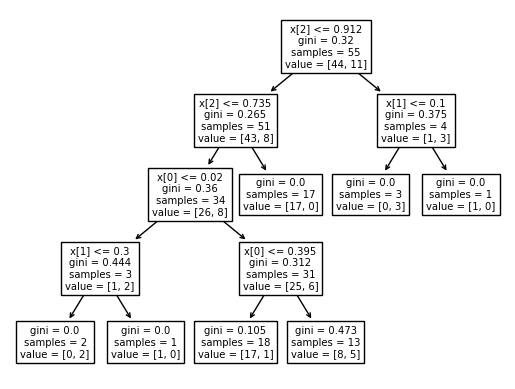

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc= DecisionTreeClassifier(max_depth = 4, criterion='gini')
dtc.fit(x_train_np_mm, y_train)
print(accuracy_score(dtc.predict(x_test_np_mm), y_test_np))
tree.plot_tree(dtc)


### - Observation:- As we checked in above 'DecisionTreeClassifier' we passed few parameters like 'max_depth' here we are describing about the level for the depth of the tree and then 'criterion'= 'gini' it'll basically shows about impurity of the nodes.

## * Next we are using 'Random Forest Classifier' Machine Learning Algorithm in order to train and check acccuracy for our Model.

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth = 5, n_estimators= 10)
rfc.fit(x_train_np_mm, y_train_np)
print(accuracy_score(rfc.predict(x_test_np_mm), y_test_np))

0.7083333333333334


In [62]:
### Hyperparametric tuning using gridsearchcv()
forest_params = [{'max_depth': list(range(2, 12)), 'n_estimators': [10,50,100,150,200]}]
model_cv = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

model_cv.fit(x_train_np_mm, y_train_np)
print(accuracy_score(model_cv.predict(x_test_np_mm), y_test_np))

0.875


### - Observation:- We have used few parameters in 'RandomForestClassifier' like 'max_depth' it'll shows the level of depth in individual tree and 'n_estimators' like numbers of tree available in forest etc. we checked and we got the accuracy of around '70%' but then we tried to hyperparameter tuning this parameters means we tried to give manually details to the parameters and change according to that in order to get better result which we got around 87%'.

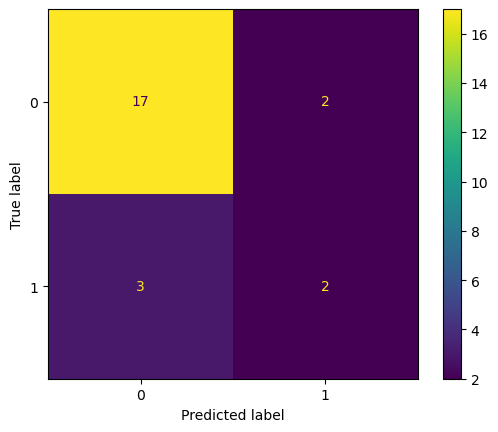

In [63]:
### Is accuracy the correct metric to judge our models? Do we remember the target distribution?
### Confusion matrix

cm= confusion_matrix(y_test_np, ans)
disp= ConfusionMatrixDisplay(cm)
disp.plot()

In [64]:
ans_p[:,0]

array([0.41385012, 0.23175919, 0.91812272, 0.97924785, 0.3509732 ,
       0.99683141, 0.79045377, 0.9897831 , 0.98489815, 0.57463612,
       0.89208274, 0.89064597, 0.98410843, 0.86295795, 0.9160177 ,
       0.99536059, 0.98339966, 0.81113482, 0.99317432, 0.27235537,
       0.95807319, 0.97860194, 0.80309132, 0.847853  ])